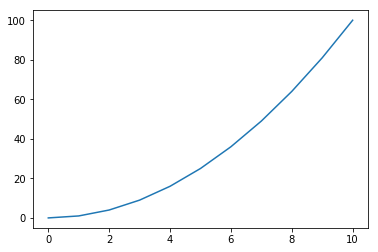

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [0,1,2,3,4,5,6,7,8,9,10]
y = [x**2 for x in x]
plt.plot(x,y)
plt.show()

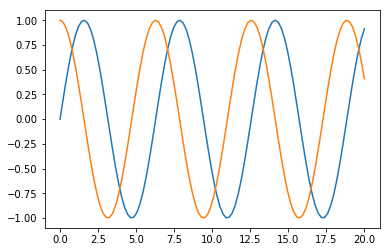

In [2]:
x = np.linspace(0,20,100)
y = np.sin(x)
z = np.cos(x)
#plt.plot(x,y,z) Так не получится
plt.plot(x,y,x,z)
plt.show()

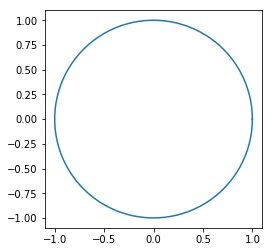

In [3]:
s1 = np.array([1j**x for x in np.linspace(0,4,100)],dtype='complex')
plt.axes().set_aspect('equal')
plt.plot(s1.real,s1.imag)
plt.show()

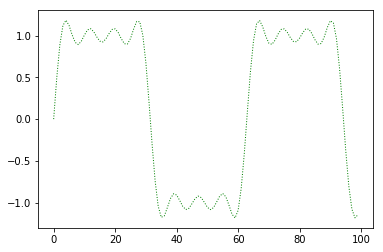

In [4]:
from math import pi, sin
from functools import reduce
ft = [reduce((lambda x,k: x+(4/pi)*sin((phi/10)*(2*k-1))/(2*k-1)), [k for k in range(5)]) for phi in range(0,100)]
#plt.plot(ft)
#plt.plot(ft, color = 'black')
#plt.plot(ft, color = 'black', linewidth = 5)
plt.plot(ft, color = 'green', linewidth = 1, linestyle='dotted')
plt.show()
# Подробности: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

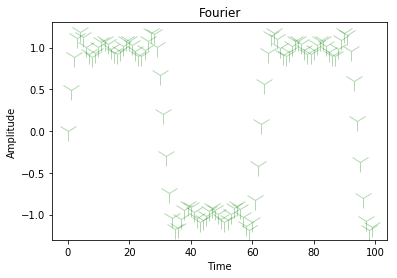

In [5]:
plt.title('Fourier')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(ft, color='green', linewidth=1, linestyle='', marker='1', markersize=20, alpha=0.3)
plt.show()

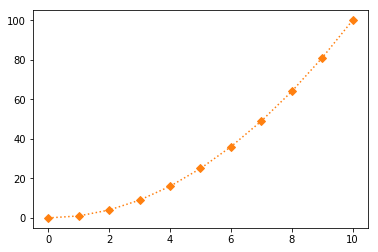

In [6]:
# Colors
# 'b'	blue, 'g'	green, 'r'	red, 'c'	cyan, 'm'	magenta, 'y'	yellow, 'k'	black, 'w'	white
# If the color is the only part of the format string, you can additionally use any matplotlib.colors spec,
# e.g. full names ('green') or hex strings ('#008000').

# Markers
# '.'	point, ','	pixel, 'o'	circle, 'v'	triangle_down, '^'	triangle_up, '<'	triangle_left, 
# '>'	triangle_right, '1'	tri_down, '2'	tri_up, '3'	tri_left, '4'	tri_right,
# 's'	square, 'p'	pentagon, '*'	star, 'h'	hexagon1, 'H'	hexagon2, '+'	plus, 'x'	x, 
# 'D'	diamond, 'd'	thin_diamond, '|'	vline, '_'	hline 

# Line Styles
# '-'	solid line style, '--'	dashed line style, '-.'	dash-dot line style, ':'	dotted line style

x = [0,1,2,3,4,5,6,7,8,9,10]
y = [x**2 for x in x]
#plt.plot(x,y, '+')
#plt.plot(x,y, 'gD:')
plt.plot(x,y, 'D:', color='#FF8010')
plt.show()

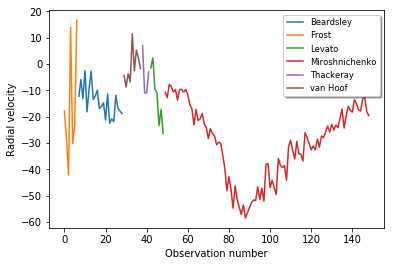

In [7]:
import pandas as pd
dsco = pd.read_csv('Data\\Delta_Sco_all_rv.csv')
dsg = dsco.groupby('Observer')

observers = [observer for observer, data in dsg]
magnitudes = [data['Magnitude'] for observer, data in dsg]

plt.plot(magnitudes[0], label=observers[0])
plt.plot(magnitudes[1], label=observers[1])
plt.plot(magnitudes[2], label=observers[2])
plt.plot(magnitudes[3], label=observers[3])
plt.plot(magnitudes[4], label=observers[4])
plt.plot(magnitudes[5], label=observers[5])

plt.xlabel('Observation number')
plt.ylabel('Radial velocity')
plt.legend(loc='upper right', shadow=True, fontsize='small') # См. https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
plt.show()

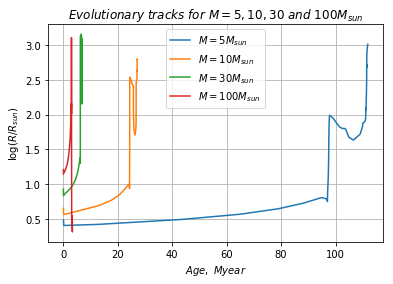

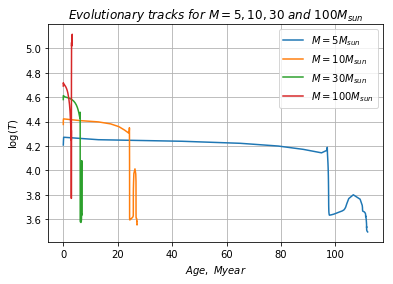

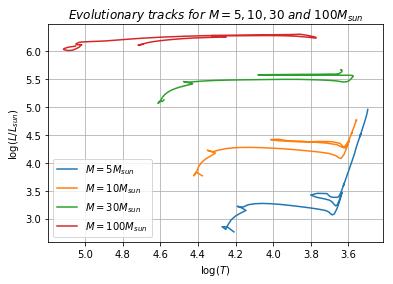

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import tarfile
%matplotlib inline

'''
WORKING WITH TAR-GZ ARCHIVES
>>> import  tarfile
>>> tar = tarfile.open("test.tar")
>>> tar.getmembers()
After that, you can use extractfile() to extract the members
as file object. Just an example:

tar = tarfile.open("data008.tar.gz")
for member in tar.getmembers():
    f=tar.extractfile(member)
    content=f.read()
    print "%s has %d newlines" %(member, content.count("\n"))
    print "%s has %d spaces" % (member,content.count(" "))
    print "%s has %d characters" % (member, len(content))
tar.close()

With the file object "f" in the above example,
you can use read(), readlines() etc.

FIELDS DESCRIPTION
01 Model number  
02 Age of model in years  
03 log-10 of the radius in solar radii  
04 log-10 of the surface temperature in kelvin  
05 log-10 of the surface luminosity in solar luminosities  
06 log-10 of the surface temperature, adjusted for WR atmosphere as in Meynet & Maeder (2005)  
07 mass in solar masses  
08 location in mass of the boundary of the hydrogen burning shell in solar masses  
09 location in mass of the boundary of the helium burning shell in solar masses 
10 surface abundance mass fraction of hydrogen  
11 surface abundance mass fraction of helium   
12 surface abundance mass fraction of carbon   
13 surface abundance mass fraction of nitrogen  
14 surface abundance mass fraction of oxygen  
15 central core abundance mass fraction of hydrogen 
16 central core abundance mass fraction of helium   
17 central core abundance mass fraction of carbon   
18 central core abundance mass fraction of nitrogen  
19 central core abundance mass fraction of oxygen  
20 central core abundance mass fraction of neon  
21 central core abundance mass fraction of magnesium  
22 central core log10 degeneracy (psi)  
23 central core log10 density in g/cm^3  
24 central core log10 temperature in kelvin  
25 wind velocity in km/s  
26 mass-loss rate in solar masses per year  
'''

arch_content = {}
tar = tarfile.open("Example3\\data008.tar.gz")
for member in tar.getmembers():
    arch_content[member.name] = tar.extractfile(member)
    # Building the dictionary: {'file_name', 'file_descriptor'}

track_5 = np.genfromtxt(arch_content['data_z008_5'], skip_header=35)
age_M5 = track_5[:, 1]
log_R5 = track_5[:, 2]
log_T5 = track_5[:, 3]
log_L5 = track_5[:, 4]
track_10 = np.genfromtxt(arch_content['data_z008_10'], skip_header=35)
age_M10 = track_10[:, 1]
log_R10 = track_10[:, 2]
log_T10 = track_10[:, 3]
log_L10 = track_10[:, 4]
track_30 = np.genfromtxt(arch_content['data_z008_30'], skip_header=35)
age_M30 = track_30[:, 1]
log_R30 = track_30[:, 2]
log_T30 = track_30[:, 3]
log_L30 = track_30[:, 4]
track_100 = np.genfromtxt(arch_content['data_z008_100'], skip_header=35)
age_M100 = track_100[:, 1]
log_R100 = track_100[:, 2]
log_T100 = track_100[:, 3]
log_L100 = track_100[:, 4]



plt.figure(3)
M5, *_ = plt.plot(age_M5 / 1e6, log_R5, label='$M = 5M_{sun}$')
M10, *_ = plt.plot(age_M10 / 1e6, log_R10, label='$M = 10M_{sun}$')
M30, *_ = plt.plot(age_M30 / 1e6, log_R30, label='$M = 30M_{sun}$')
M100, *_ = plt.plot(age_M100 / 1e6, log_R100, label='$M = 100M_{sun}$')
plt.xlabel('$Age,$ $Myear$')
plt.ylabel('$\\log (R/R_{sun})$')
plt.title('$Evolutionary$ $tracks$ $for$ $M = 5, 10, 30$ $and$ $100 M_{sun}$')
plt.legend(handles=[M5, M10, M30, M100], loc='upper center')
plt.grid()
#if sys.platform == 'win32':
#    plt.get_current_fig_manager().window.setGeometry(900, 350, 700, 500)
#else:
#    plt.get_current_fig_manager().window.wm_geometry("700x500+900+350")


plt.figure(2)
M5, *_ = plt.plot(age_M5 / 1e6, log_T5, label='$M = 5M_{sun}$')
M10, *_ = plt.plot(age_M10 / 1e6, log_T10, label='$M = 10M_{sun}$')
M30, *_ = plt.plot(age_M30 / 1e6, log_T30, label='$M = 30M_{sun}$')
M100, *_ = plt.plot(age_M100 / 1e6, log_T100, label='$M = 100M_{sun}$')
plt.xlabel('$Age,$ $Myear$')
plt.ylabel('$\\log (T)$')
plt.title('$Evolutionary$ $tracks$ $for$ $M = 5, 10, 30$ $and$ $100 M_{sun}$')
plt.legend(handles=[M5, M10, M30, M100], loc='upper right')
plt.grid()
#if sys.platform == 'win32':
#    plt.get_current_fig_manager().window.setGeometry(750, 50, 700, 500)
#else:
#    plt.get_current_fig_manager().window.wm_geometry("700x500+750+50")


plt.figure(1)
plt.gca().invert_xaxis()
M5, *_ = plt.plot(log_T5, log_L5, label='$M = 5M_{sun}$')
M10, *_ = plt.plot(log_T10, log_L10, label='$M = 10M_{sun}$')
M30, *_ = plt.plot(log_T30, log_L30, label='$M = 30M_{sun}$')
M100, *_ = plt.plot(log_T100, log_L100, label='$M = 100M_{sun}$')
plt.xlabel('$\\log (T)$')
plt.ylabel('$\\log (L/L_{sun})$')
plt.title('$Evolutionary$ $tracks$ $for$ $M = 5, 10, 30$ $and$ $100 M_{sun}$')
plt.legend(handles=[M5, M10, M30, M100], loc='lower left')
plt.grid()
#if sys.platform == 'win32':
#    plt.get_current_fig_manager().window.setGeometry(10, 50, 700, 500)
#else:
#    plt.get_current_fig_manager().window.wm_geometry("700x500+10+50")

plt.show()

In [9]:
a = [5,]
b,*_ = a
b


5

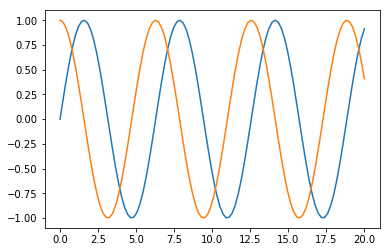

(<matplotlib.lines.Line2D at 0x15cc84a17f0>,
 <matplotlib.lines.Line2D at 0x15cc84a19b0>)

In [10]:
x = np.linspace(0,20,100)
y = np.sin(x)
z = np.cos(x)
a, b = plt.plot(x,y,x,z)
plt.show()
a, b

In [11]:
# Примеры скриптов:
# Example1/stats.py
# Exsmple2/plot_chart2.py